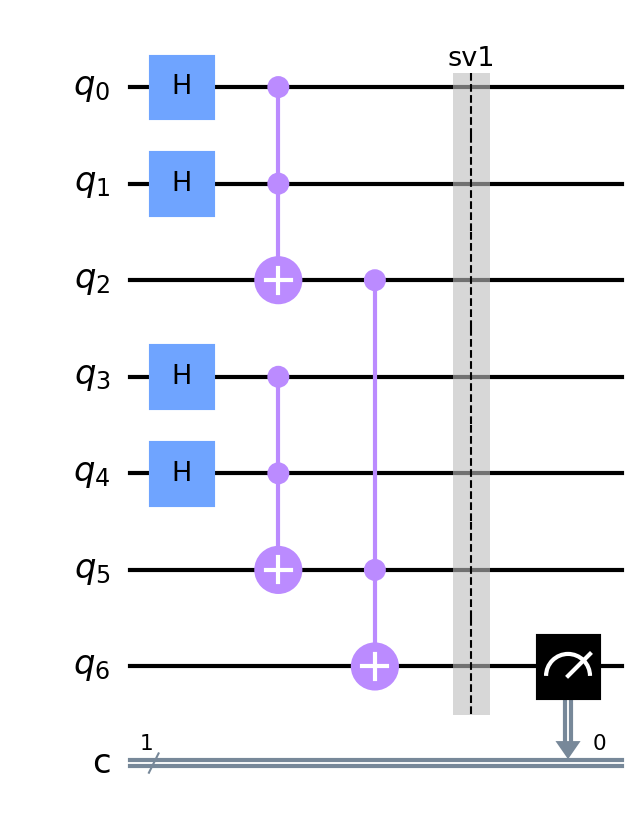

<IPython.core.display.Math object>

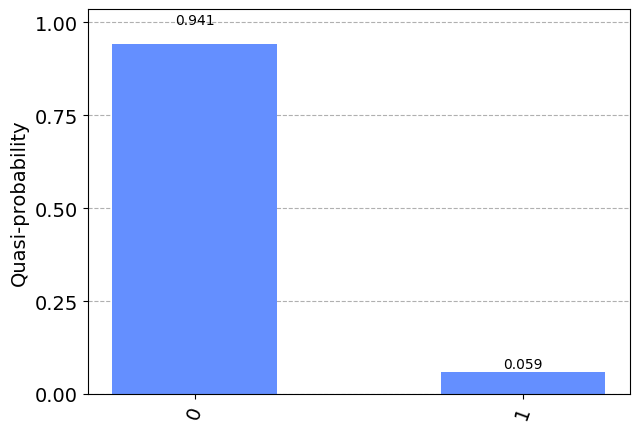

In [10]:
"""quantum_circuit3.ipynb"""
# This code implements and analyzes the output of a quantum circuit.

# Cell 1-> Implement the circuit and display the histogram after 1,024 shots

# Allow for type hinting
from __future__ import annotations
import typing

# Used for calculations
import numpy as np

# IBM QISKIT quantum circuit elements
import qiskit  # type: ignore
from qis101_utils import as_latex
from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore
from qiskit.visualization import plot_histogram  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Fire up a backend simulator on your computer. Store the output in the variable "backend"
backend: Any = Aer.get_backend("aer_simulator")
# Create a quantum circuit with 7 qubits and 1 classical bit all initialized to the 0 (North pole) state
qc: Any = QuantumCircuit(7, 1)
# Apply a Hadamard gate to q0
qc.h(0)
# Apply a Hadamard gate to q1
qc.h(1)
# Apply a Hadamard gate to q3
qc.h(3)
# Apply a Hadamard gate to q4
qc.h(4)
# Perform a CCNOT gate with q1 and q0 as the control lines and q2 as the target
qc.ccx(0, 1, 2)
# Perform a CCNOT gate with q3 and q4 as the control lines and q5 as the target
qc.ccx(3, 4, 5)
# Perform a CCNOT gate with q2 and q5 as the control lines and q6 as the target
qc.ccx(2, 5, 6)
# Take a snapshot of the state vector
qc.save_statevector("sv1")
# measure q6, project that output onto the single classical bit
qc.measure(6, 0)
# Execute the circuit and generate the statistics
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()
sv1: Any = result.data(0)["sv1"]
# Draw the circuit
display(qc.draw(output="mpl", scale=1.5))
# Print the state vector using latex
display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))

# Plot the probability statistics-> default=1024 shots
display(plot_distribution(counts))  # type: ignore

Question 1: Explain the exact probability 𝑞_6=1 if there was no quantum noise
-> The probability of q_6==1 is 1/16 if there was no quantum noise. The first CCNOT gate takes in q0 and q1 (which have both been put into superposition) and targets q2. Thus, the state vector yields 4 possible output states for q2, q1, and q0: 000, 001, 010, and 111. The second CCNOT gate takes in q3 and q4 (both in superposition) and targets q5. The state vector then gives 4 possible output values for q5, q4 and q3: 000, 001, 010, 111. The final CCNOT gate has the outputs of the first and second CCNOT gates as its control lines and acts on q6. Since the previous CCNOT gates gave 4 possible output states each, the final state vector has 4*4=16 possible output states. For the first two CCNOT gates, the most significant bit only had a 1⁄4 probability of being a 1. Therefore, the probability of the MSB (i.e. q6) being a 1 after the final CCNOT gate is ¼ * ¼ = 1/16.
-> Answer aided by solutions from Dr. David Biersach.
